In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

/home/sayin/.local/lib/python3.10/site-packages/upsetplot/data.py:4: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import LooseVersion


In [2]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

## Python

In [3]:
print(
    None or True,
    None or False,
    None == None,
    None is None,
    type(None),
    # None / 2, Error
    sep= '\n'
)

True
False
True
True
<class 'NoneType'>


## Numpy

In [4]:
print(
    np.nan or True,
    np.nan == np.nan,
    np.nan is np.nan,
    np.nan / 2,
    type(np.nan),
    np.isnan(np.nan),
    sep='\n'
)

nan
False
True
nan
<class 'float'>
True


## Pandas

In [5]:
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x=[0, 1, np.nan, np.nan, None],
        y=[0, 1, pd.NA, np.nan, None]
    )
)

test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [6]:
test_missing_df.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [7]:
pd.Series([1, np.nan])

0    1.0
1    NaN
dtype: float64

In [8]:
pd.Series([pd.to_datetime('2023-03-31'), np.nan])

0   2023-03-31
1          NaT
dtype: datetime64[ns]

In [9]:
pd.Series([-1]).isnull()

0    False
dtype: bool

## Load Files

In [10]:
pima_indians_diabetes_url = "https://nrvis.com/data/mldata/pima-indians-diabetes.csv"

In [11]:
!wget -O ../data/raw/pima-indians-diabetes.csv { pima_indians_diabetes_url } -q

In [12]:
diabetes_df = pd.read_csv(
    '../data/raw/pima-indians-diabetes.csv',
    names =[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ],
    sep=','
)

In [13]:
diabetes_df

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Naniar

In [14]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

In [15]:
datasets_dfs = {}

for dataset_name in datasets_names:

    dataset_file = f"{ dataset_name }{ extension }"
    dataset_output_file = f"../data/raw/{ dataset_file }"
    dataset_url = f"{ base_url }{ dataset_file }"
    
    !wget -q -O { dataset_output_file } { dataset_url }

    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

In [16]:
locals().update(**datasets_dfs)
del datasets_dfs

In [17]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, diabetes_df.shape

((736, 8), (37700, 9), (245, 34), (768, 9))

In [18]:
riskfactors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

## Missign values

In [19]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [20]:
riskfactors_df.shape

(245, 34)

### Use the code of the notebook 02

In [21]:
%run 01Pandas_missing_extension.ipynb

In [22]:
riskfactors_df.missing.number_complete()

7144

In [23]:
riskfactors_df.missing.number_missing()

1186

In [24]:
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


In [25]:
riskfactors_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


In [26]:
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


In [27]:
riskfactors_df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


In [28]:
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable = 'weight_lbs',
        span_every=50
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


In [29]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable = 'weight_lbs'
    )
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


## Visualization

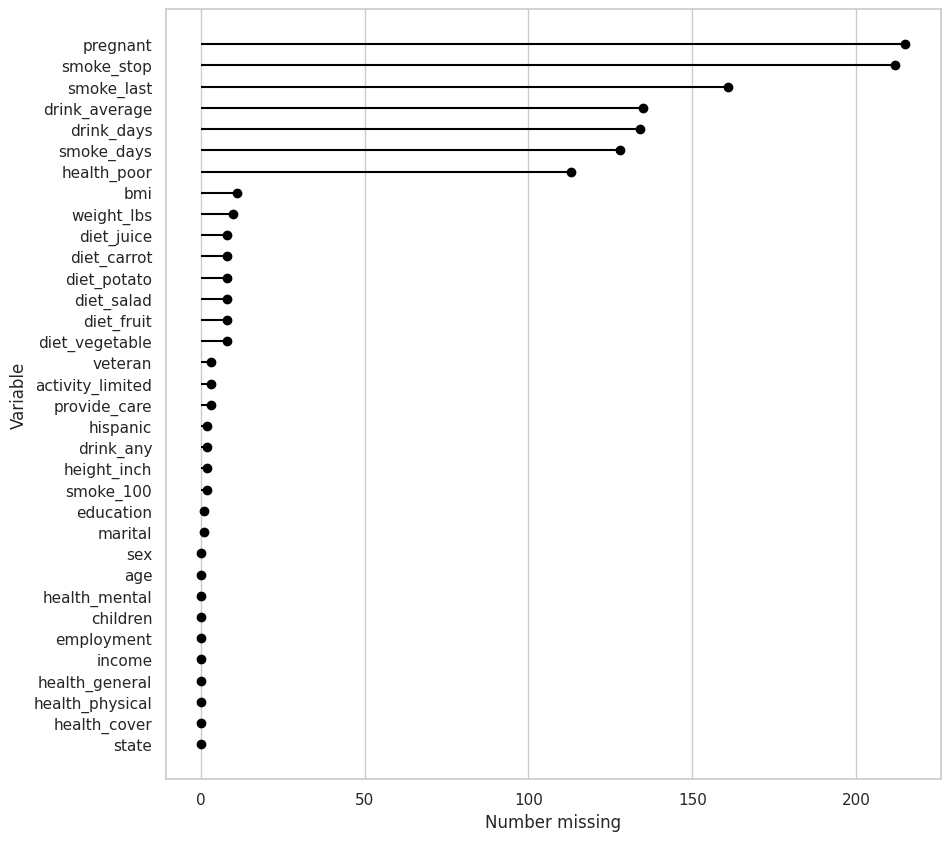

In [30]:
riskfactors_df.missing.missing_variable_plot()

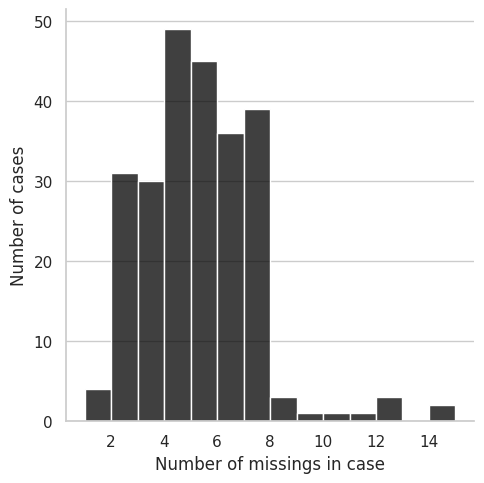

In [31]:
riskfactors_df.missing.missing_case_plot()

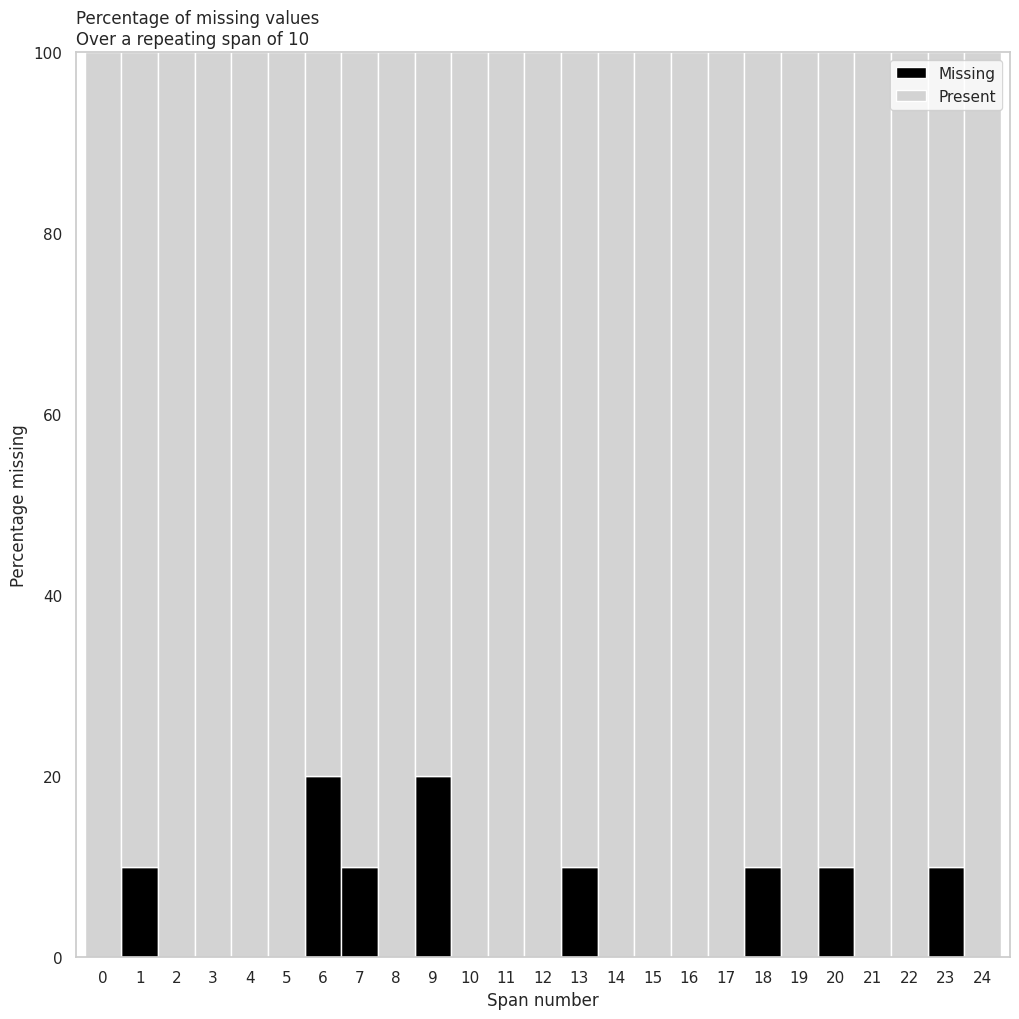

In [32]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable = 'weight_lbs',
        span_every=10,
        rot = 0
    )
)

<AxesSubplot:>

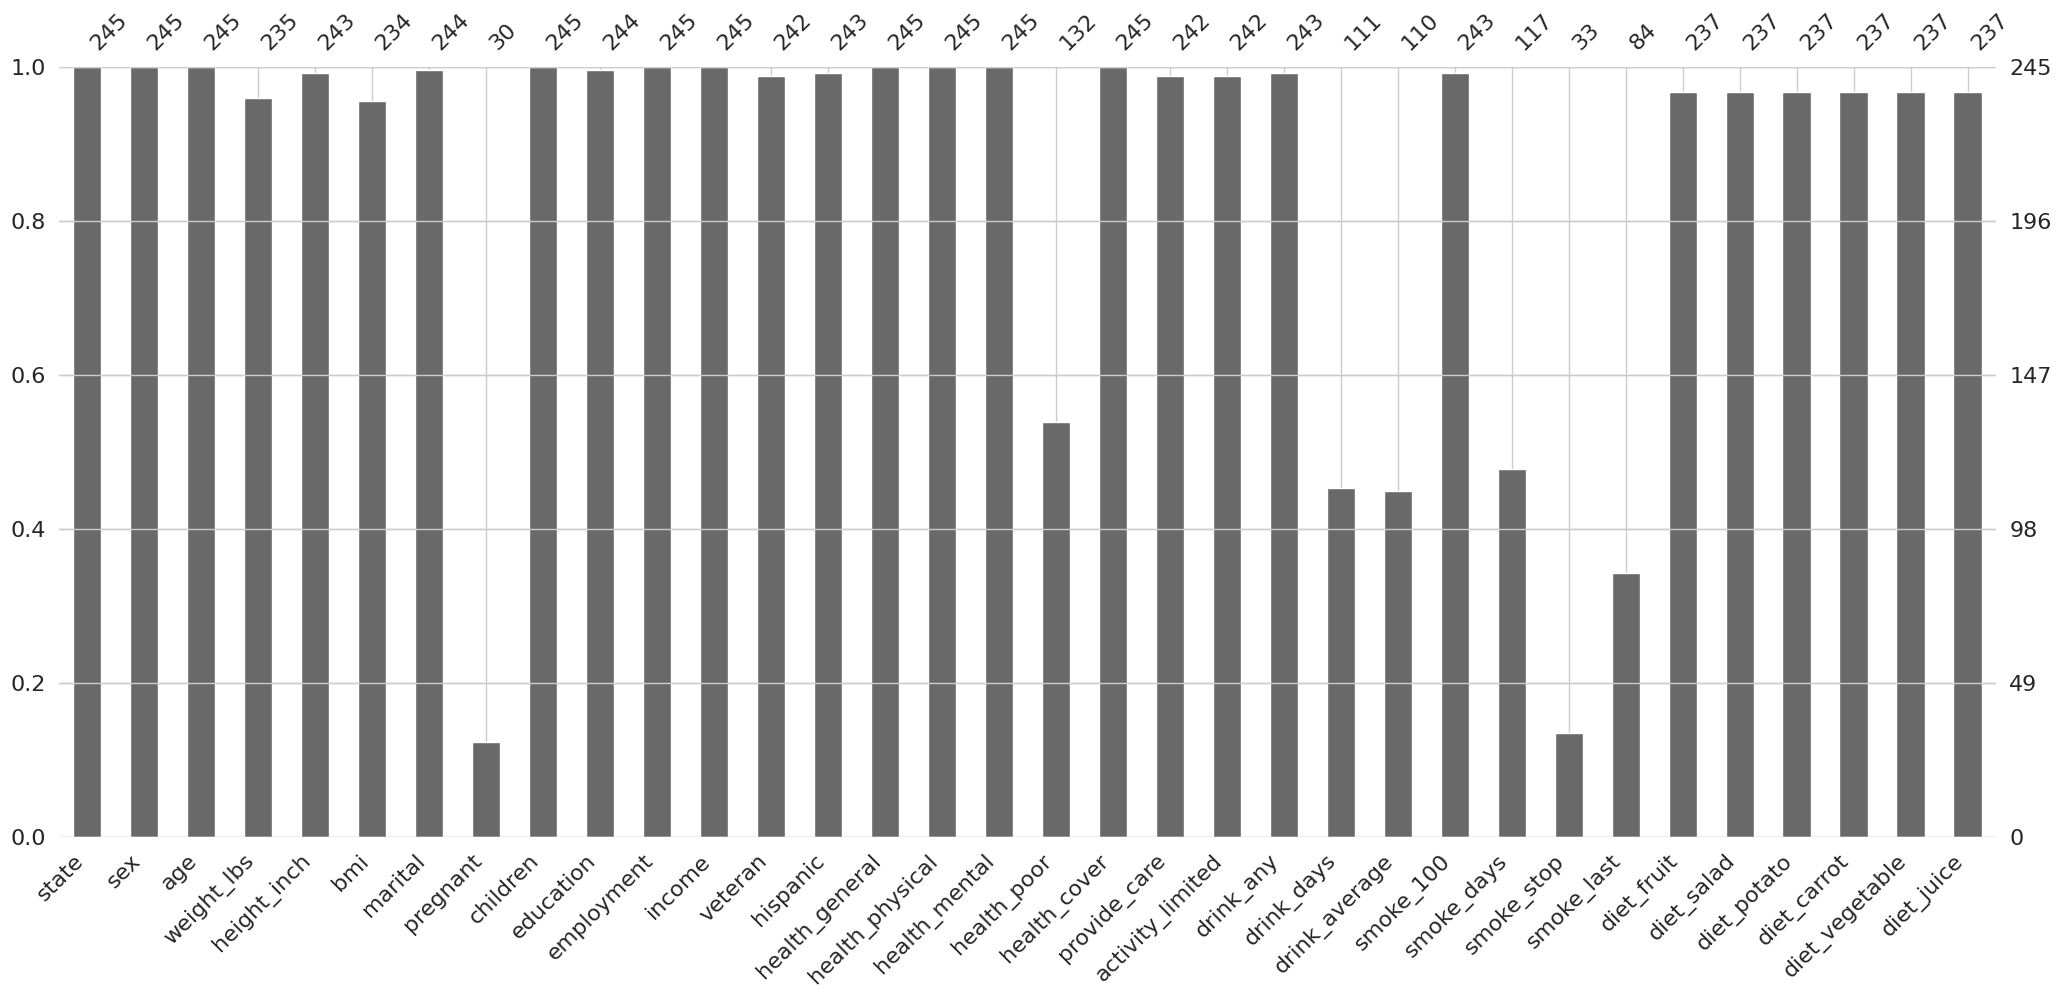

In [33]:
missingno.bar(df=riskfactors_df)

<AxesSubplot:>

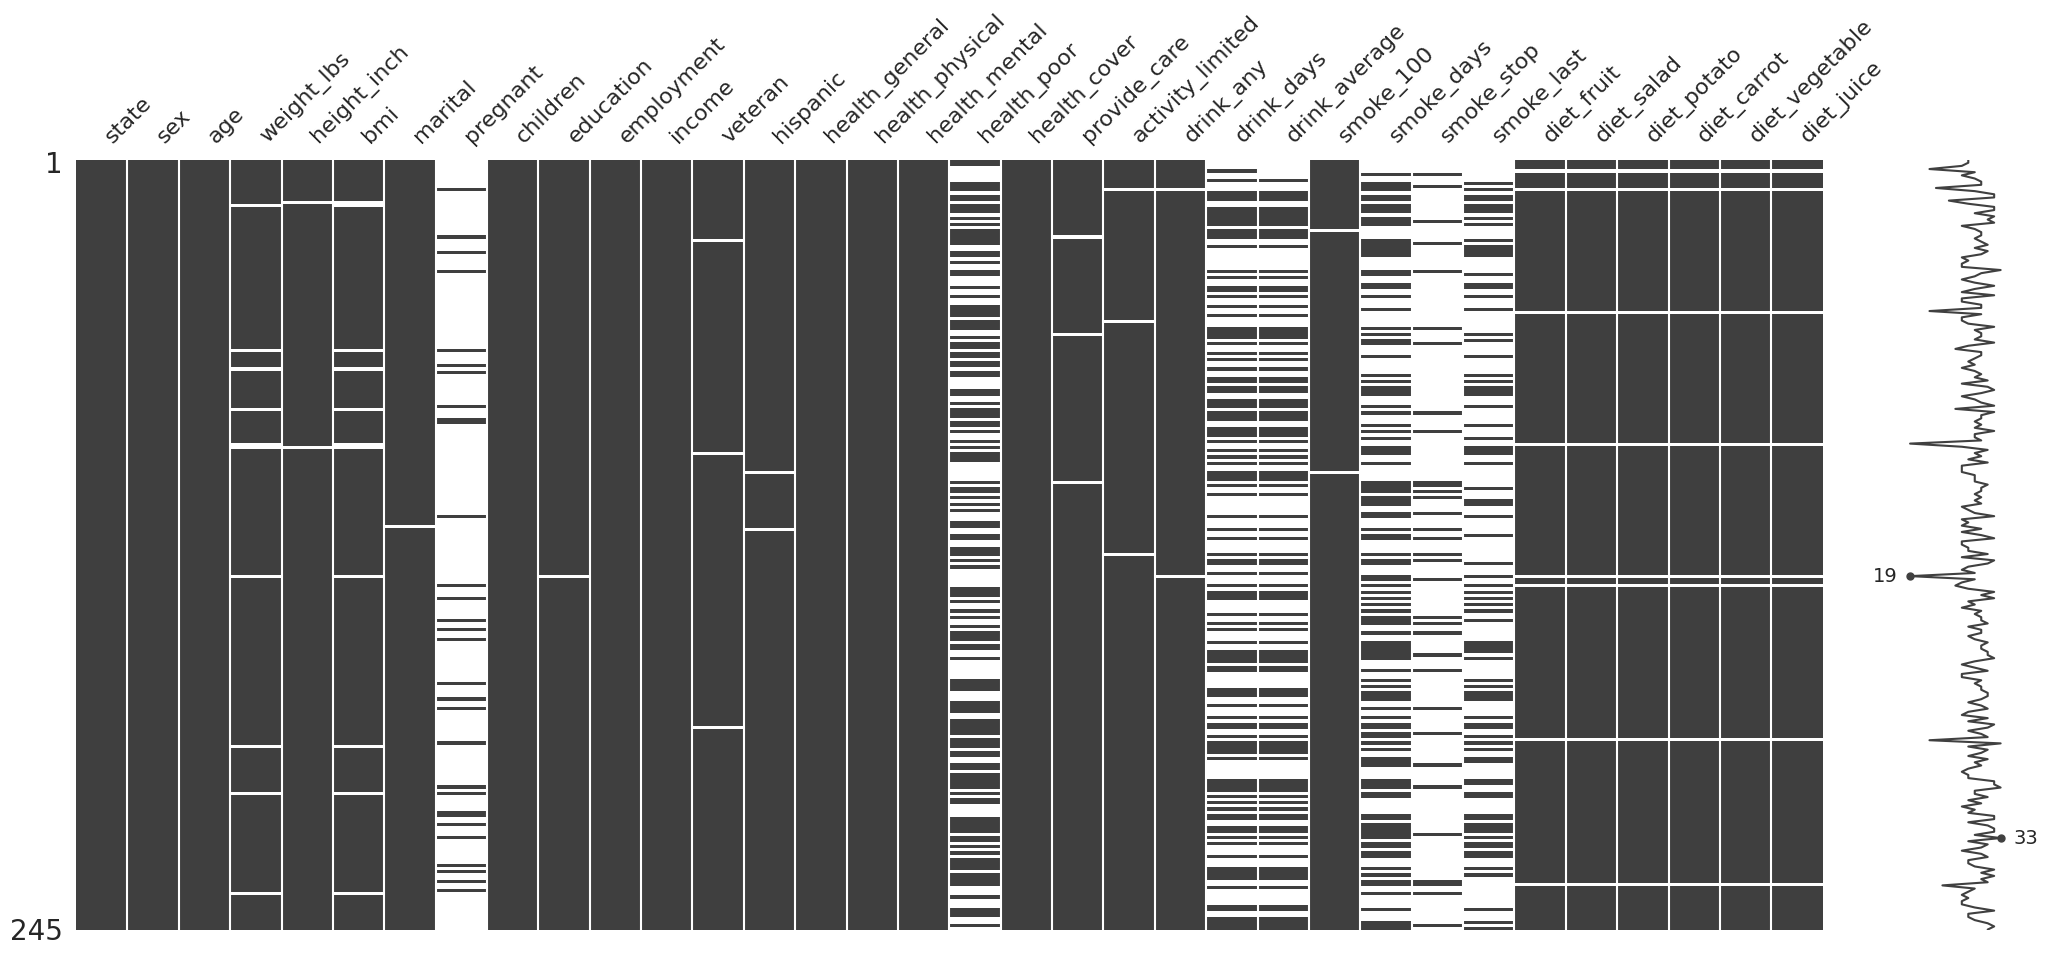

In [34]:
missingno.matrix(df=riskfactors_df)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

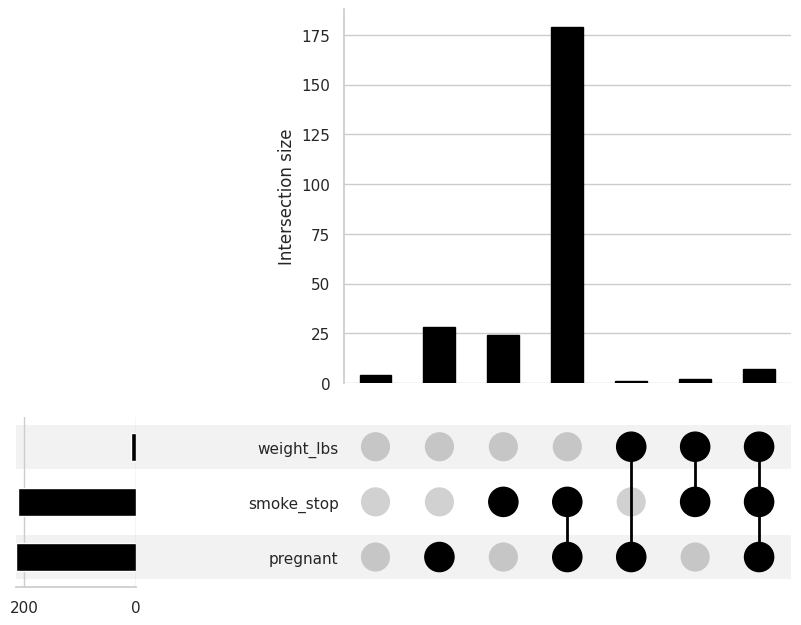

In [35]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables=['pregnant', 'weight_lbs', 'smoke_stop'],
        element_size = 60
    )
)

## Coding of missing values

In [36]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

In [37]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

In [38]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,-99,E,-101
4,-98,F,-1
5,-99,G,-1


In [39]:
missing_data_example_df.missing.number_missing()

0

In [40]:
missing_data_example_df.dtypes

x    object
y    object
z     int64
dtype: object

In [41]:
missing_data_example_df.x.unique()

array([1, 3, 'NA', -99, -98], dtype=object)

In [42]:
(
    missing_data_example_df
    .select_dtypes(object)
    .apply(pd.unique)
)

x     [1, 3, NA, -99, -98]
y    [A, N/A, NA, E, F, G]
dtype: object

In [43]:
pd.read_csv(
    '../data/raw/missing_data_enconding_example.csv',
    na_filter=True,
    na_values=[-99,-1]
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


In [44]:
(
    missing_data_example_df
    .replace(
        to_replace=[-99, 'NA'],
        value=np.nan
    )
)

,x,y,z
0,1.0,A,-100.0
1,3.0,N/A,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


In [45]:
(
    missing_data_example_df
    .replace(
        to_replace={
            "x": {
                -99: np.nan
            }
        }
    )
)

,x,y,z
0,1,A,-100
1,3,N/A,-99
2,NA,NA,-98
3,NaN,E,-101
4,-98,F,-1
5,NaN,G,-1


### Conversion of implicit missing values to explicit missing values

In [46]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


In [47]:
(
    implicit_to_explicit_df
    .pivot_wider(
        index = 'name',
        names_from = 'time',
        values_from = 'value'
    )
)

,name,afternoon,morning,night
0,lynn,310.0,350.0,NaN
1,zelda,NaN,320.0,NaN


In [48]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=['name']
    )
    .reset_index(name='n')
    .query('n<3')
)

,name,n
1,zelda,1


## Missing tuples expose 

In [49]:
(
    implicit_to_explicit_df
    .complete(
        'name',
        'time'
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


In [50]:
(
    implicit_to_explicit_df
    .complete(
        {'name': ['lynn', 'zelda']},
        {'time': ['morning', 'afternoon']},
        sort= True
    )
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,zelda,afternoon,NaN
3,zelda,morning,320.0
4,lynn,night,NaN


In [51]:
(
    implicit_to_explicit_df
    .complete(
        'name',
        'time',
        fill_value = np.nan
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,NaN
5,zelda,night,NaN


In [52]:
(
    implicit_to_explicit_df
    .complete(
        'name',
        'time',
        fill_value = 0,
        explicit = False
    )
)

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0
4,zelda,afternoon,0.0
5,zelda,night,0.0


### Values types  

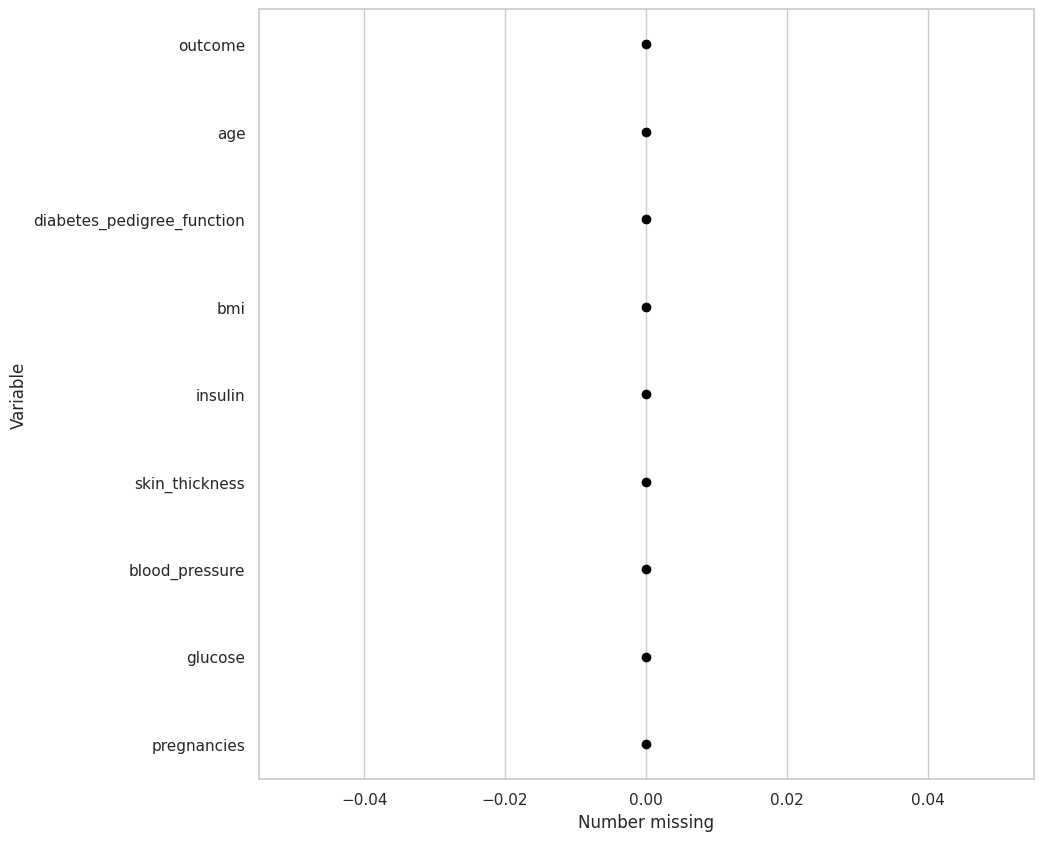

In [53]:
diabetes_df.missing.missing_variable_plot()

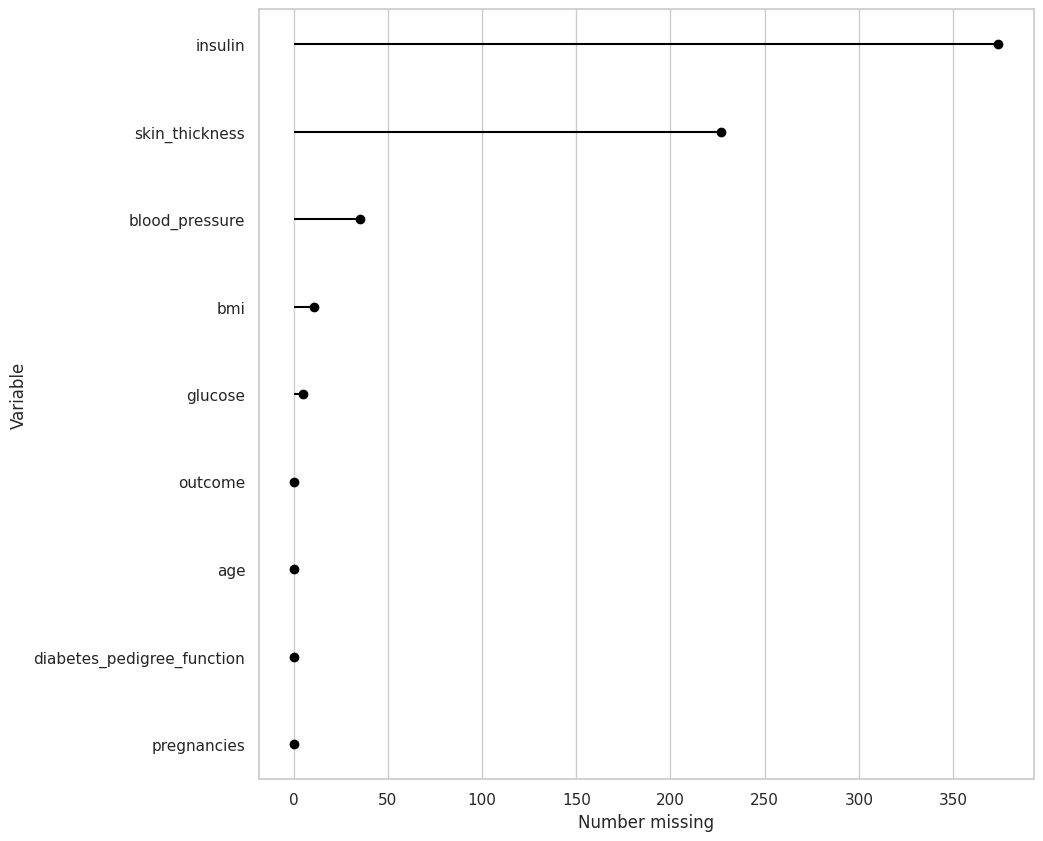

In [54]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0,np.nan)
diabetes_df.missing.missing_variable_plot()

<AxesSubplot:>

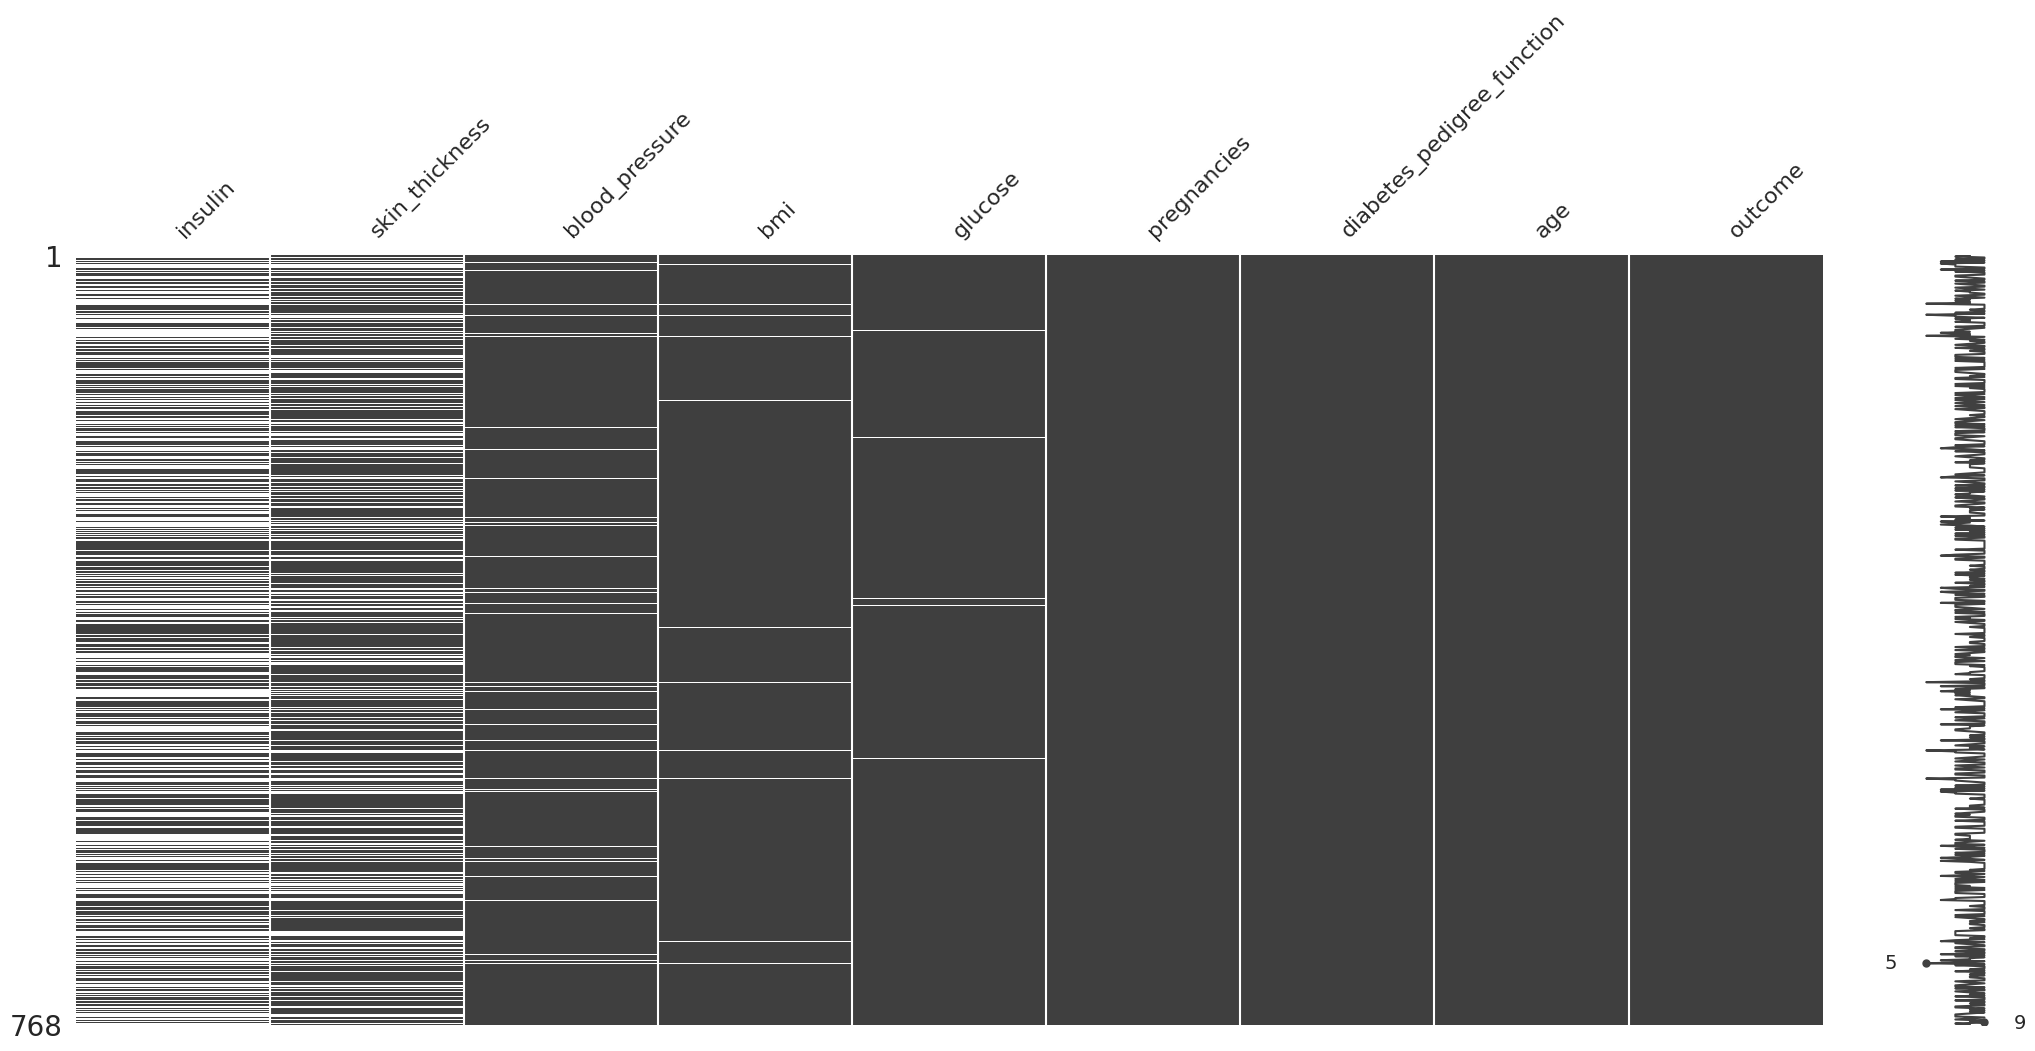

In [55]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

<AxesSubplot:>

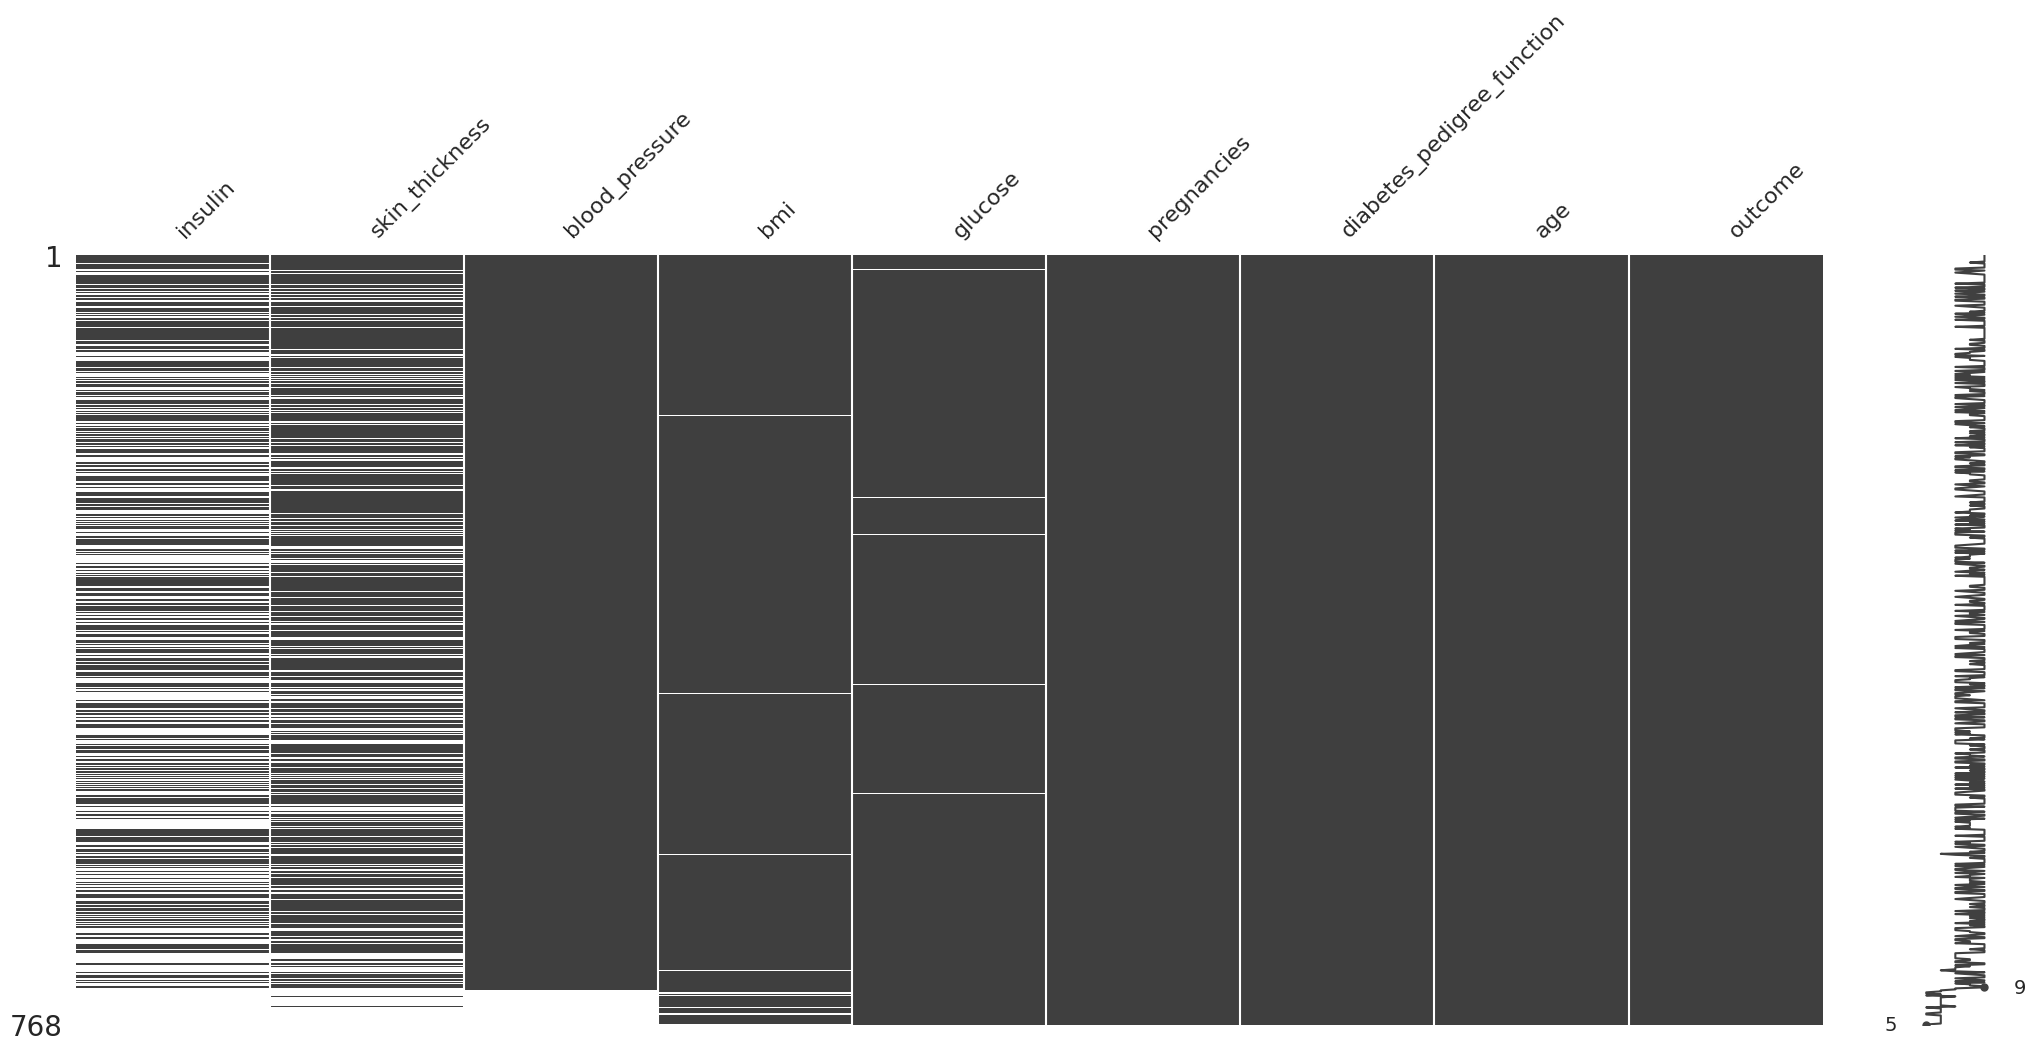

In [56]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by= 'blood_pressure')
    .pipe(missingno.matrix)
)

<AxesSubplot:>

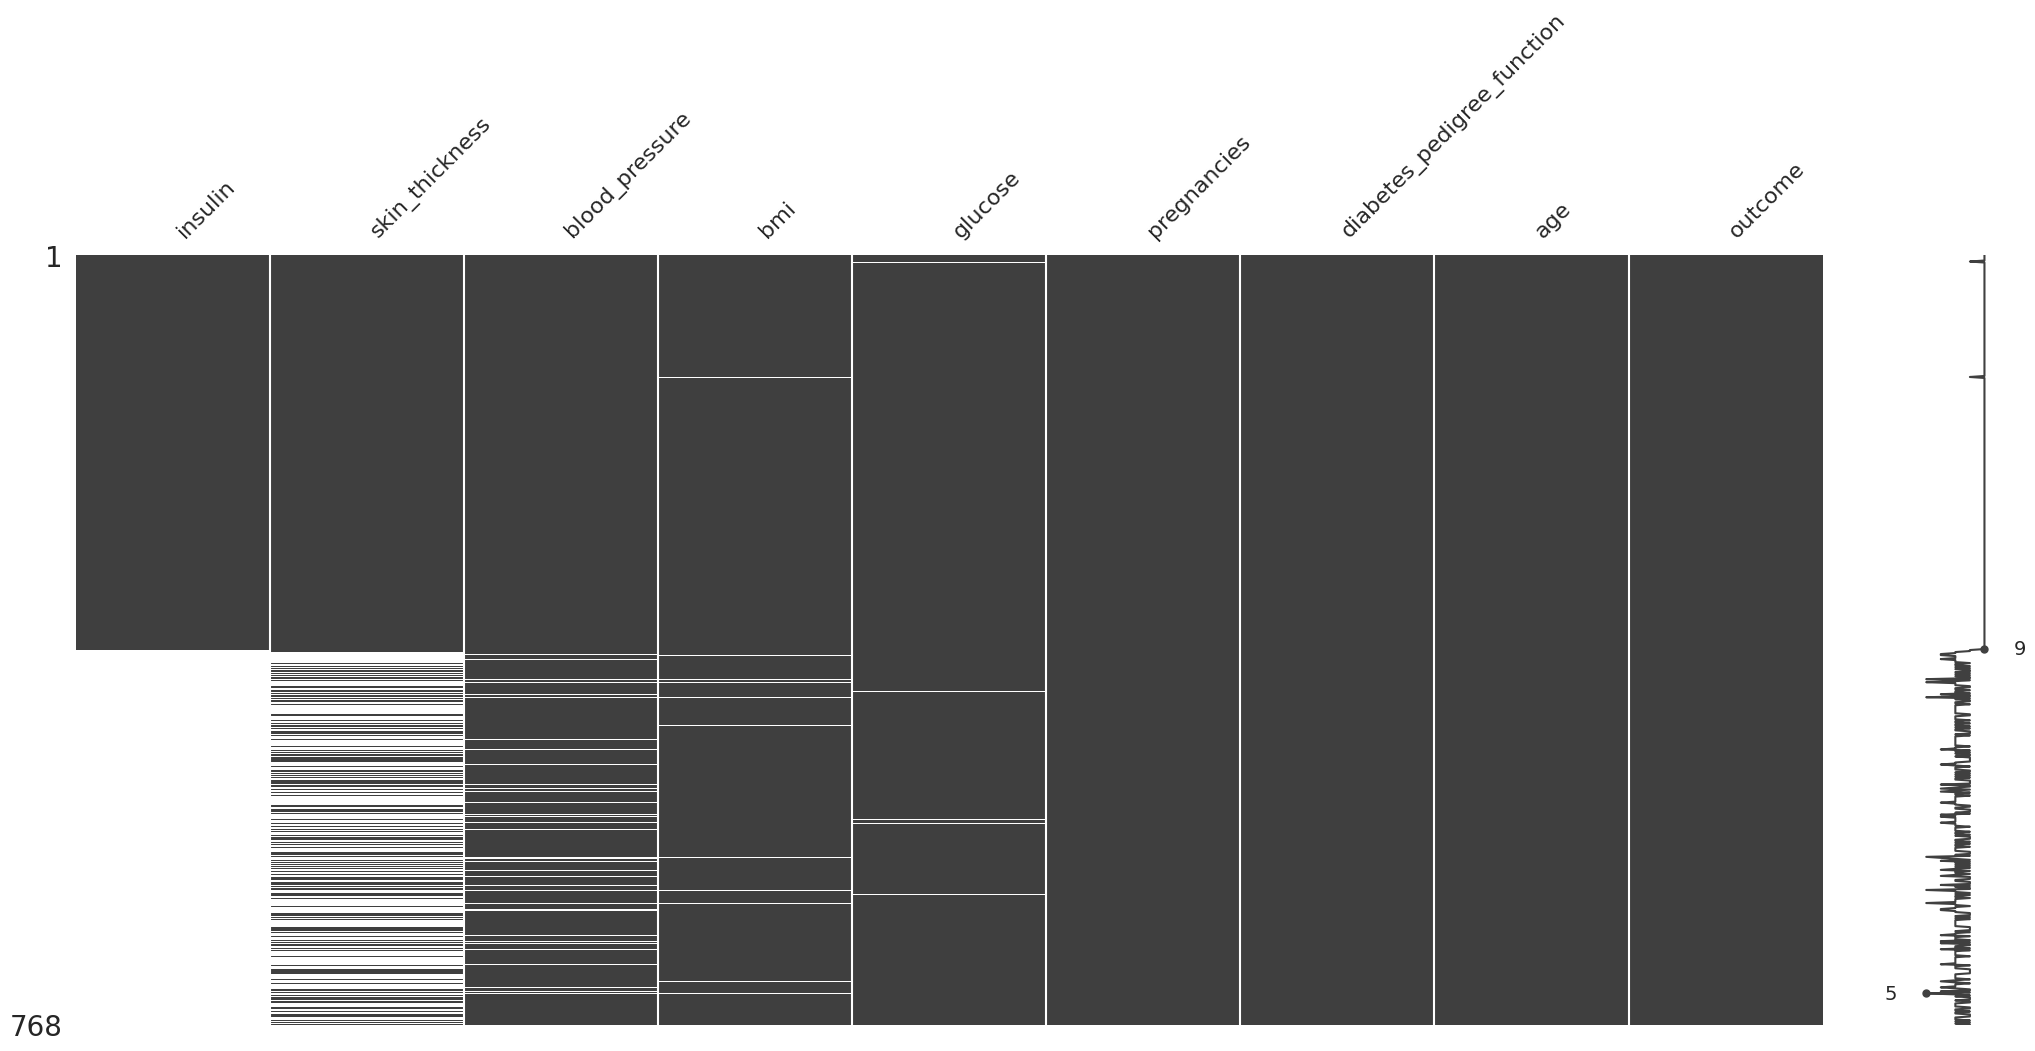

In [57]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by= 'insulin')
    .pipe(missingno.matrix)
)

### Shadow Matrix

In [63]:
(
    riskfactors_df
    .isna()
    .replace({
        False: 'Not Missing',
        True: 'Missing'
    })
    .add_suffix('_NA')
    .pipe(
        lambda shadow_matrix: pd.concat(
            [riskfactors_df, shadow_matrix],
            axis='columns'
        )
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


In [67]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing=True)
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


In [70]:
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .groupby(['weight_lbs_NA'])
    ['age']
    .describe()
    .reset_index()
)

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


In [58]:
## NO borrar